In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)
import matplotlib
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import os
import pandas as pd
pd.set_option('html', False)
from IPython import display
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import datetime

xlat = np.loadtxt("/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt")
xlong = np.loadtxt("/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt")
hgt = np.loadtxt("/Users/claudiopierard/VC/datos/hgt_d02_interpolado.txt")
months = {1:'jan', 2:'feb', 3:'mar',4: 'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dic'}
path2datosVC = "../datos/dataframes_VC/cca/"
path2pollutants = "../datos/contaminantes/2015/CCA/"

path2estaciones = "../datos/loc_estaciones/air_quality_stn.xy"
estaciones = pd.read_table(path2estaciones, index_col=0, names=['long','lat', 'height'])
estaciones = estaciones.transpose().to_dict()
estaciones['CCA']

{'height': 2294.0, 'lat': 19.326110999999997, 'long': -99.176110999999992}

# Contaminantes

In [2]:
o3_2015 = pd.read_csv(path2pollutants + "CCA_o3_2015.csv", index_col=0)
o3_2015.index = pd.to_datetime(o3_2015.index)

In [3]:
pm25_2015 = pd.read_csv(path2pollutants + "CCA_pm25_2015.csv", index_col=0)
pm25_2015.index = pd.to_datetime(pm25_2015.index)

In [4]:
co_2015 = pd.read_csv(path2pollutants + "CCA_co_2015.csv", index_col=0)
co_2015.index = pd.to_datetime(co_2015.index)

In [5]:
pm25_2015.head()

                    station   pm25
2015-01-01 01:00:00     CCA  118.0
2015-01-01 02:00:00     CCA  107.0
2015-01-01 03:00:00     CCA  121.0
2015-01-01 04:00:00     CCA  124.0
2015-01-01 05:00:00     CCA  123.0

In [6]:
o3_2015['2015-05-05 15:00:00':'2015-05-06 18:00:00']['o3']

2015-05-05 15:00:00    145.0
2015-05-05 16:00:00    116.0
2015-05-05 17:00:00     69.0
2015-05-05 18:00:00     35.0
2015-05-05 19:00:00     34.0
2015-05-05 20:00:00     22.0
2015-05-05 21:00:00     17.0
2015-05-05 22:00:00     11.0
2015-05-05 23:00:00     15.0
2015-05-06 00:00:00      3.0
2015-05-06 01:00:00      3.0
2015-05-06 02:00:00     15.0
2015-05-06 03:00:00     15.0
2015-05-06 04:00:00      9.0
2015-05-06 05:00:00      9.0
2015-05-06 06:00:00      6.0
2015-05-06 07:00:00      2.0
2015-05-06 08:00:00      4.0
2015-05-06 09:00:00     20.0
2015-05-06 10:00:00     43.0
2015-05-06 11:00:00     65.0
2015-05-06 12:00:00     79.0
2015-05-06 13:00:00     96.0
2015-05-06 14:00:00     97.0
2015-05-06 15:00:00     80.0
2015-05-06 16:00:00     59.0
2015-05-06 17:00:00     53.0
2015-05-06 18:00:00     50.0
Name: o3, dtype: float64

In [9]:
dic_vc = pd.read_csv(path2datosVC + "dic_dataframe_cca.csv", index_col=0)
dic_vc.index = pd.to_datetime(dic_vc.index)

In [11]:
date_i = '2015-12-24 00:00:00'
date_f = '2015-12-25 12:00:00'

pd.concat([dic_vc[date_i:date_f]['VC_24'], o3_2015[date_i:date_f]['o3'], pm25_2015[date_i:date_f]['pm25']], axis=1)

                     VC_24    o3   pm25
2015-12-24 00:00:00     44   1.0   21.0
2015-12-24 01:00:00     36   NaN   17.0
2015-12-24 02:00:00     13   NaN    NaN
2015-12-24 03:00:00     22   NaN   15.0
2015-12-24 04:00:00     21   1.0   10.0
2015-12-24 05:00:00     21   3.0    9.0
2015-12-24 06:00:00     22   2.0    7.0
2015-12-24 07:00:00     20   1.0   10.0
2015-12-24 08:00:00     20   2.0   13.0
2015-12-24 09:00:00     36   5.0    8.0
2015-12-24 10:00:00    205  10.0   32.0
2015-12-24 11:00:00    736  23.0   52.0
2015-12-24 12:00:00    705  45.0   60.0
2015-12-24 13:00:00   1197  65.0   47.0
2015-12-24 14:00:00   2537  80.0   27.0
2015-12-24 15:00:00   3035  96.0   21.0
2015-12-24 16:00:00   2555  85.0   28.0
2015-12-24 17:00:00   2607  73.0   30.0
2015-12-24 18:00:00   1610  53.0   27.0
2015-12-24 19:00:00    358  40.0   26.0
2015-12-24 20:00:00    222  36.0   34.0
2015-12-24 21:00:00    127  37.0   35.0
2015-12-24 22:00:00    208  20.0   39.0
2015-12-24 23:00:00    186  13.0   37.0


In [31]:
date_i = '2015-05-09 16:00:00'
date_f = '2015-05-10 18:00:00'

pd.concat([may_vc[date_i:date_f]['VC_24'], o3_2015[date_i:date_f]['o3']], axis=1)

                     VC_24     o3
2015-05-09 16:00:00   4019  156.0
2015-05-09 17:00:00   2977  115.0
2015-05-09 18:00:00   6908   59.0
2015-05-09 19:00:00   2079   36.0
2015-05-09 20:00:00   1633   35.0
2015-05-09 21:00:00    855   28.0
2015-05-09 22:00:00    558   12.0
2015-05-09 23:00:00    123    7.0
2015-05-10 00:00:00    720   15.0
2015-05-10 01:00:00     93    NaN
2015-05-10 02:00:00    125    NaN
2015-05-10 03:00:00     37   18.0
2015-05-10 04:00:00    111   17.0
2015-05-10 05:00:00    140    7.0
2015-05-10 06:00:00    146   11.0
2015-05-10 07:00:00     16    9.0
2015-05-10 08:00:00     31    8.0
2015-05-10 09:00:00    325   25.0
2015-05-10 10:00:00    656   53.0
2015-05-10 11:00:00   1699   77.0
2015-05-10 12:00:00   2336  103.0
2015-05-10 13:00:00   2531  122.0
2015-05-10 14:00:00   3545  142.0
2015-05-10 15:00:00   3298  153.0
2015-05-10 16:00:00   4141  128.0
2015-05-10 17:00:00   6690   99.0
2015-05-10 18:00:00   2344   84.0

In [32]:
date_i = '2015-05-22 00:00:00'
date_f = '2015-05-22 23:00:00'

pd.concat([may_vc[date_i:date_f]['VC_24'], o3_2015[date_i:date_f]['o3']], axis=1)

                     VC_24    o3
2015-05-22 00:00:00   1119  27.0
2015-05-22 01:00:00    764  30.0
2015-05-22 02:00:00    806  31.0
2015-05-22 03:00:00    696  34.0
2015-05-22 04:00:00    618  29.0
2015-05-22 05:00:00    260  16.0
2015-05-22 06:00:00    197  12.0
2015-05-22 07:00:00    326   6.0
2015-05-22 08:00:00    256   4.0
2015-05-22 09:00:00    691   5.0
2015-05-22 10:00:00    901   7.0
2015-05-22 11:00:00   2588  13.0
2015-05-22 12:00:00   3077  35.0
2015-05-22 13:00:00   3913  61.0
2015-05-22 14:00:00   4394  88.0
2015-05-22 15:00:00   5312  85.0
2015-05-22 16:00:00   4862  71.0
2015-05-22 17:00:00   2576  65.0
2015-05-22 18:00:00   1507  73.0
2015-05-22 19:00:00    834  45.0
2015-05-22 20:00:00   2559  19.0
2015-05-22 21:00:00    377   8.0
2015-05-22 22:00:00    472   6.0
2015-05-22 23:00:00    744   2.0

# Jan

In [6]:
jan_vc = pd.read_csv(path2datosVC + "jan_dataframe_cca.csv", index_col=0)
jan_vc.index = pd.to_datetime(jan_vc.index)

#### Adimensionalizarlo

In [21]:
vc_dimless = jan_vc['VC_24']/ jan_vc['VC_24'].max()

In [26]:
vc_dimless.shape

(744,)

## O3 dimless

In [52]:
o3_dimless = o3_2015["2015-01-01":"2015-01-31"]['o3'] / o3_2015["2015-01-01":"2015-01-31"]['o3'].max()

In [53]:
o3_dimless

2015-01-01 01:00:00    0.016
2015-01-01 02:00:00    0.032
2015-01-01 03:00:00    0.008
2015-01-01 04:00:00    0.016
2015-01-01 05:00:00    0.008
2015-01-01 06:00:00    0.008
2015-01-01 07:00:00    0.008
2015-01-01 08:00:00    0.016
2015-01-01 09:00:00    0.032
2015-01-01 10:00:00    0.176
2015-01-01 11:00:00    0.432
2015-01-01 12:00:00    0.600
2015-01-01 13:00:00    0.576
2015-01-01 14:00:00    0.448
2015-01-01 15:00:00    0.344
2015-01-01 16:00:00    0.328
2015-01-01 17:00:00    0.312
2015-01-01 18:00:00    0.272
2015-01-01 19:00:00    0.248
2015-01-01 20:00:00    0.152
2015-01-01 21:00:00    0.088
2015-01-01 22:00:00    0.016
2015-01-01 23:00:00    0.008
2015-01-02 00:00:00    0.008
2015-01-02 01:00:00    0.000
2015-01-02 02:00:00    0.000
2015-01-02 03:00:00    0.008
2015-01-02 04:00:00    0.000
2015-01-02 05:00:00    0.000
2015-01-02 06:00:00    0.000
                       ...  
2015-01-30 18:00:00    0.552
2015-01-30 19:00:00    0.432
2015-01-30 20:00:00    0.232
2015-01-30 21:

In [57]:
vc_dimless["2015-01-01 01:00:00":"2015-01-31"].shape

(743,)

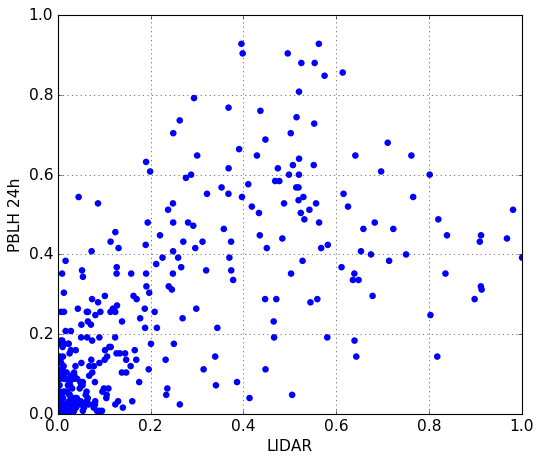

In [428]:
plt.figure(figsize = (7,6))
scat = plt.scatter(vc_dimless["2015-01-01 01:00:00":"2015-01-31"],o3_dimless, edgecolors='none', s = 35)

# create a second axes for the colorbar
#ax2 = plt.add_axes([0.95, 0.1, 0.03, 0.8])
#cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

#Format
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('LIDAR')
plt.ylabel('PBLH 24h')
xx = np.linspace(-100, 3500, 10)

#plt.plot(xx, blt.ajuste_lineal(xx, 0, 1), '--') #Plot identity
plt.rcParams.update({'font.size': 14})
#plt.title('UTC-6')
plt.grid()
#plt.colorbar()
plt.tight_layout()
#plt.savefig(path2gunshot + 'GSP_' + mm + '_' + ceilo + '_' + key, facecolor=(1,1,1,0))


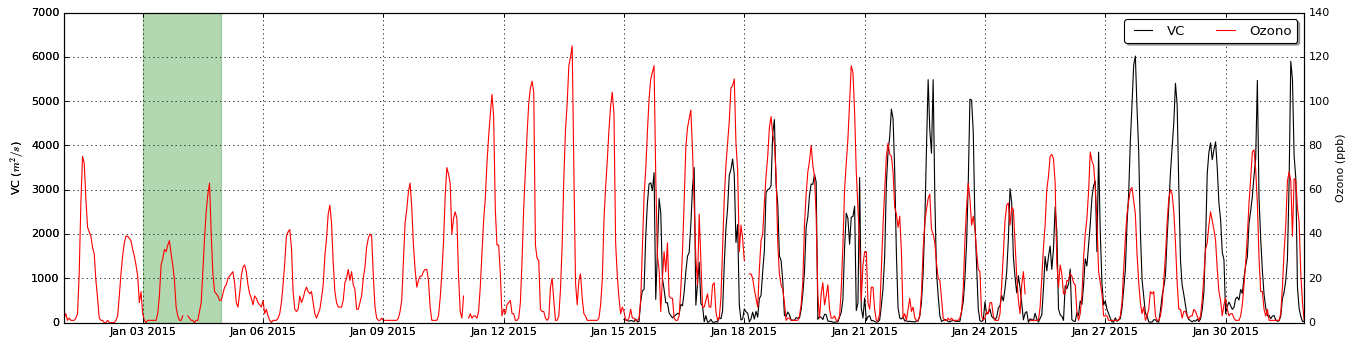

In [275]:
plt.figure(figsize=[20,5])
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust()
par1 = host.twinx()

#offset = 60
#new_fixed_axis = par2.get_grid_helper().new_fixed_axis

#host.set_xlim(0, 13)
#host.set_ylim(0, 2)

#host.set_xlabel("Días")
host.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("Ozono (ppb)")

#host.scatter(np.linspace(1,12, 12), vc_max_mes, marker='d', c = 'k')
host.plot(jan_vc['VC_24'],  c = 'k', label = 'VC')

#par1.scatter(np.linspace(1,12, 12), o3_max_mes, marker='s', c = 'r')
par1.plot(o3_2015["2015-01-01":"2015-01-31"]['o3'], c = 'r', label = 'Ozono')
#par1.set_ylim(0, 4)

host.axvspan(pd.to_datetime("2015-01-03 00:00:00"), pd.to_datetime("2015-01-04 23:00:00"), color='g', alpha=0.3)

host.legend(fancybox = True, shadow = True, ncol=2, loc = 'best')
host.grid()
#host.axis["left"].label.set_color(p1.get_color())
#par1.axis["right"].label.set_color(p2.get_color())
#host.set_xticks(range(1,13));
#host.set_xticklabels();


In [170]:
def dayOfWeek_array(datetime_arr):
    y = datetime_arr.year
    m = datetime_arr.month
    d = datetime_arr.day
    t = [0, 3, 2, 5, 0, 3, 5, 1, 4, 6, 2, 4]
    new_m = []
    for i in m:
        new_m.append(t[i-1])
    new_m = np.array(new_m)
    y -= m < 3
    return np.trunc((y + y/4 - y/100 + y/400 + new_m + d) % 7).astype(np.int)

In [350]:
A = o3_2015["2015-01-01":"2015-01-31"].index.date
B = o3_2015["2015-01-01":"2015-01-31"].index.time
C = dayOfWeek_array(o3_2015["2015-01-01":"2015-01-31"].index)

In [354]:
DF = pd.DataFrame({'date': A, 'time': B, 'week_index': C})
DF.index = DF.week_index
DF = DF.drop('week_index', 1)

In [376]:
sat = DF.loc[6].drop_duplicates(subset = 'date', keep = 'first')

In [377]:
sun = DF.loc[0].drop_duplicates(subset = 'date', keep = 'last')

In [381]:
new_sun = []
new_sat = []
for i in range(0, len(sun.date.values)):
    dt = datetime.datetime.combine(sun['date'].values[i], sun['time'].values[i])
    new_sun.append(dt)

for i in range(0, len(sat.date.values)):
    dt = datetime.datetime.combine(sat['date'].values[i], sat['time'].values[i])
    new_sat.append(dt)

sat = new_sat
sun = new_sun

In [390]:
sat[-1] + datetime.timedelta(hours = 23)

datetime.datetime(2015, 1, 31, 23, 0)

In [391]:
weekend = []

for j in range(0, len(sun)):
     if sun[j].day == 1:
            weekend.append([sun[j] - datetime.timedelta(hours = 23), sun[j]])
            
for i in range(0, len(sat)):
    for j in range(0, len(sun)):
        
        if sat[i].day == sun[j].day - 1:
            weekend.append([sat[i], sun[j]])
            
    if sat[i].day == 31:
        weekend.append([sat[i] , sat[i] + datetime.timedelta(hours = 23)])
        


In [392]:
weekend

[[datetime.datetime(2015, 1, 3, 0, 0), datetime.datetime(2015, 1, 4, 23, 0)],
 [datetime.datetime(2015, 1, 10, 0, 0), datetime.datetime(2015, 1, 11, 23, 0)],
 [datetime.datetime(2015, 1, 17, 0, 0), datetime.datetime(2015, 1, 18, 23, 0)],
 [datetime.datetime(2015, 1, 24, 0, 0), datetime.datetime(2015, 1, 25, 23, 0)],
 [datetime.datetime(2015, 1, 31, 0, 0), datetime.datetime(2015, 1, 31, 23, 0)]]

In [395]:
for wk in weekend:
    print(wk[1])

2015-01-04 23:00:00
2015-01-11 23:00:00
2015-01-18 23:00:00
2015-01-25 23:00:00
2015-01-31 23:00:00


In [ ]:
pd.

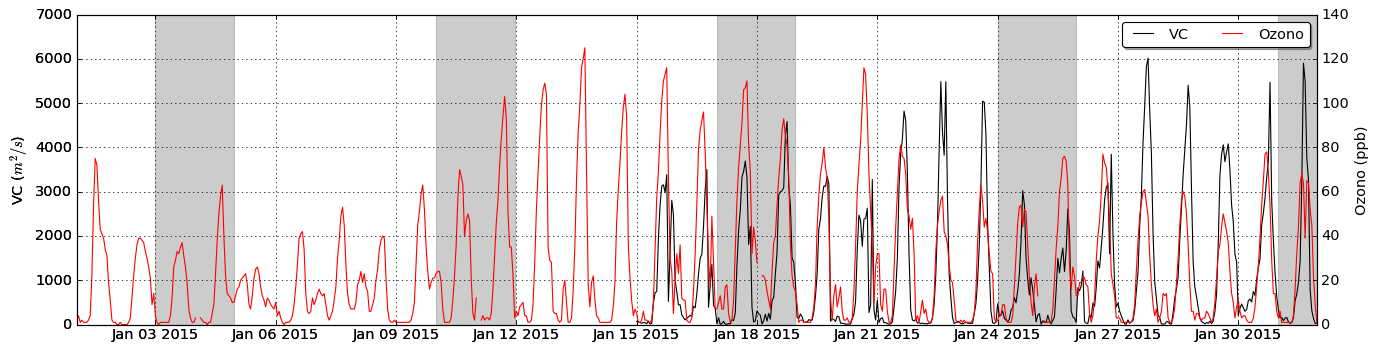

In [427]:
plt.figure(figsize=[20,5])
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust()
par1 = host.twinx()

host.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("Ozono (ppb)")

host.plot(jan_vc['VC_24'],  c = 'k', label = 'VC')
par1.plot(o3_2015["2015-01-01":"2015-01-31"]['o3'], c = 'r', label = 'Ozono')

for wk in weekend:
    host.axvspan(wk[1], wk[0], color='grey', alpha=0.4)

host.legend(fancybox = True, shadow = True, ncol=2, loc = 'best', fontsize = 13)
host.grid()
plt.rcParams.update({'font.size': 13})


## PM2.5

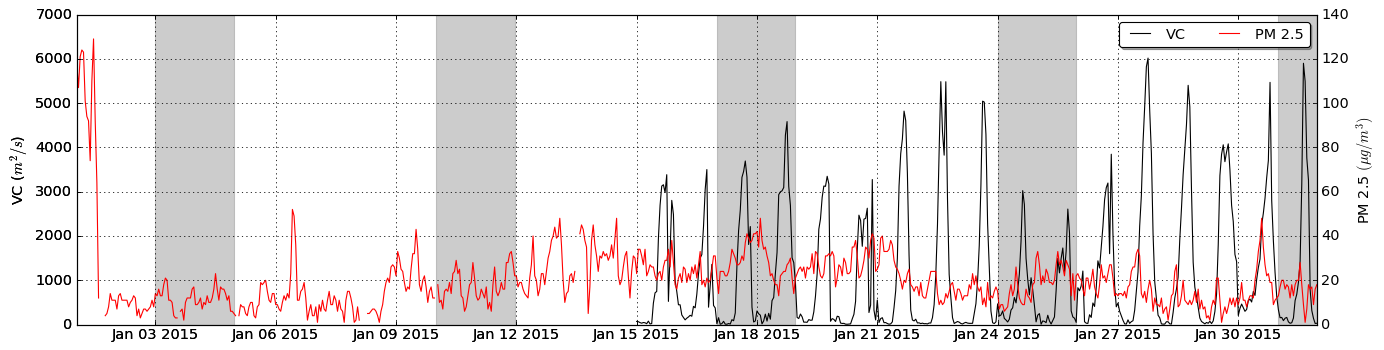

In [426]:
fig = plt.figure(figsize=[20,5])
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust()
par1 = host.twinx()

#offset = 60
#new_fixed_axis = par2.get_grid_helper().new_fixed_axis

#host.set_xlim(0, 13)
#host.set_ylim(0, 2)

#host.set_xlabel("Días")
host.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("PM 2.5 $(\mu g/m^3)$")

#host.scatter(np.linspace(1,12, 12), vc_max_mes, marker='d', c = 'k')
host.plot(jan_vc['VC_24'],  c = 'k', label = 'VC')

#par1.scatter(np.linspace(1,12, 12), pm25_max_mes, marker='s', c = 'r')
par1.plot(pm25_2015["2015-01-01":"2015-01-31"]['pm25'], c = 'r', label = 'PM 2.5')
#par1.set_ylim(0, 4)

for wk in weekend:
    host.axvspan(wk[1], wk[0], color='grey', alpha=0.4)

host.legend(fancybox = True, shadow = True, ncol=2, loc = 'best', fontsize = 13)
host.grid()
#host.axis["left"].label.set_color(p1.get_color())
#par1.axis["right"].label.set_color(p2.get_color())
#host.set_xticks(range(1,13));

## CO

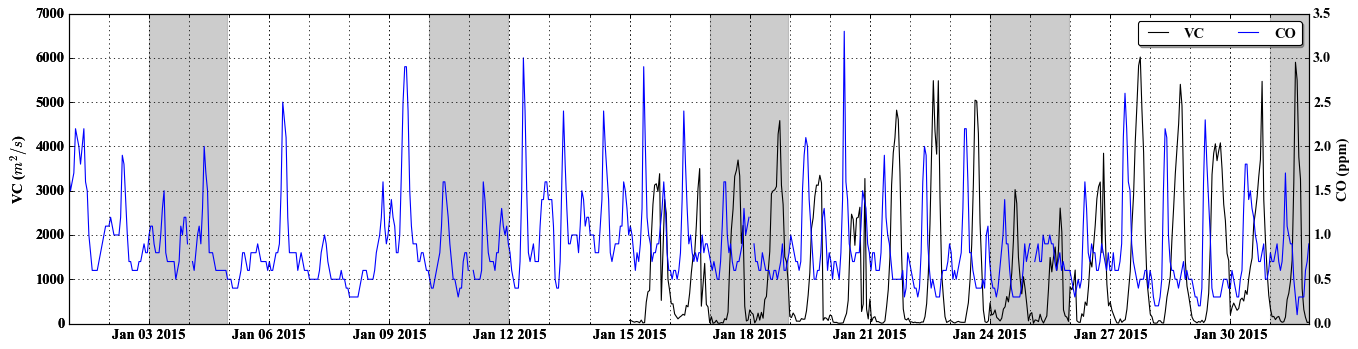

In [481]:
plt.figure(figsize=[20,5])
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust()
par1 = host.twinx()

#offset = 60
#new_fixed_axis = par2.get_grid_helper().new_fixed_axis

#host.set_xlim(0, 13)
#host.set_ylim(0, 2)

#host.set_xlabel("Días")
host.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("CO (ppm)")

#host.scatter(np.linspace(1,12, 12), vc_max_mes, marker='d', c = 'k')
host.plot(jan_vc['VC_24'],  c = 'k', label = 'VC')

#par1.scatter(np.linspace(1,12, 12), co_max_mes, marker='s', c = 'r')
par1.plot(co_2015["2015-01-01":"2015-01-31"]['co'], c = 'b', label = 'CO')
#par1.set_ylim(0, 4)


for wk in weekend:
    host.axvspan(wk[1], wk[0], color='grey', alpha=0.4)
    
host.legend(fancybox = True, shadow = True, ncol=2, loc = 'best', fontsize = 13)

plt.rcParams.update({'font.size': 13})
plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['font.family'] = "Times New Roman"
minor_axis = pd.date_range('2015-01-01', '2015-01-31', freq='1D')
host.set_xticks(minor_axis, minor=True)
host.grid(which='both')
#host.axis["left"].label.set_color(p1.get_color())
#par1.axis["right"].label.set_color(p2.get_color())
#host.set_xticks(range(1,13));
#host.set_xticklabels();


In [461]:
blt.E1or30('jan')

'31'

In [478]:
minor_axis = pd.date_range('2015-01-01 00:00:00', '2015-01-31 23:00:00', freq='1D')

In [ ]:
datetime.datetime.da